In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Importando a base tratada no notebook anterior
base = pd.read_csv(r'exames-tratado-1.csv')
base = base.drop('Unnamed: 0', axis = 1)
base.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [29]:
# Normalizando os dados
base_norm = base.copy()
norm = StandardScaler()
norm.fit(base_norm.loc[:, 'exame_1':].values)
base_norm.loc[:, 'exame_1':] = norm.transform(base_norm.loc[:, 'exame_1':].values)

In [30]:
base_norm.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


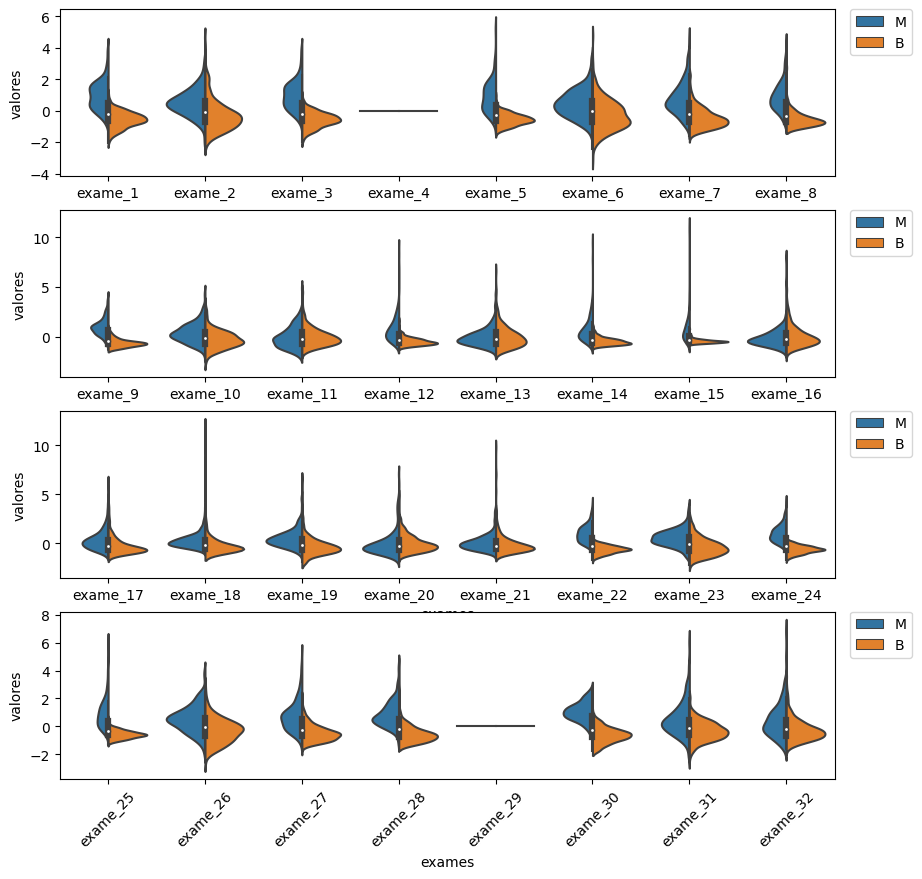

In [72]:
# Definindo tamanho do plot via plt:
plt.figure(figsize=(10, 10))

# Criando o plot:
for i in range(4):
    plt.subplot(4,1, i+1)
    # Utilizando o método melt para transformar o dataframe de maneira adequada à criação de um gráfico de violino
    dados_plot = pd.melt(base_norm.drop('id', axis = 1)[list(base_norm.columns[(i*8)+2:(i*8)+10])+['diagnostico']], id_vars='diagnostico', var_name='exames', value_name = 'valores')
    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Rodando a legenda do eixo X
plt.xticks(rotation = 45)

plt.show()

O gráfico de violino trás a distribuição dos valores de uma variável para cada uma das categorias. Quando as distribuições são muito diferentes, e tem seus máximos em valores diferentes, é um bom indício de que tal variável será importante no modelo de machine learning. Por outro lado, quando as distribuições são muito parecidas e tem seus máximos em valores parecidos, é um indício de que ela não será relevante para o modelo.

Neste gráfico é possível também identificar variáveis constantes, como é o caso do exame_4 e exame_29. Essas variáveis também podem ser removidas do modelo.

In [86]:
# Removendo variáveis constantes do modelo, realizando o treinamento novamente e verificando o score:

# Definindo inputs e outputs
x = base.drop(['id', 'diagnostico', 'exame_4', 'exame_29'], axis = 1).values
y = base['diagnostico'].values.ravel()

# Definindo a random seed
SEED = 30

# Definindo a random seed do numpy
np.random.seed(SEED)

# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Instanciando e treinando o modelo a ser treinado
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

# Calculando o score obtido com esse modelo:
score_rfc = rfc.score(x_test, y_test)*100

print(f'O modelo teve um score de {score_rfc:.2f}%')

O modelo teve um score de 95.91%


In [87]:
# Comparando com o modelo com variáveis constantes:

# Definindo inputs e outputs
x = base.drop(['id', 'diagnostico'], axis = 1).values
y = base['diagnostico'].values.ravel()

# Definindo a random seed
SEED = 30

# Definindo a random seed do numpy
np.random.seed(SEED)

# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Instanciando e treinando o modelo a ser treinado
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

# Calculando o score obtido com esse modelo:
score_rfc = rfc.score(x_test, y_test)*100

print(f'O modelo teve um score de {score_rfc:.2f}%')

O modelo teve um score de 96.49%


Houve uma pequena redução no score, porém o fato do modelo ter menos dimensões pode compensar essa pequena perca no score

In [88]:
# Exportando base tratada

base.drop(['exame_4', 'exame_29'], axis = 1).to_csv(r'exames-tratado-2.csv')